## Preprocessing

In [68]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [69]:
# Binning the 'NAME' column based on count distribution and assigning custom labels to create 'Name_Bins'.
name_counts = application_df['NAME'].value_counts()

# Define bin edges
bins = [0, 10, 50, 100, 500, 1000, float('inf')]

# Define custom labels
bin_labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1001+']

# Bin the 'Name' column with custom labels
application_df['Name_Bins'] = pd.cut(application_df['NAME'].map(name_counts), bins=bins, labels=bin_labels, right=False)

# Display the count distribution in each bin with custom labels
print(application_df['Name_Bins'].value_counts().sort_index())

0-10        21022
11-50        3523
51-100       1442
101-500      5587
501-1000     1465
1001+        1260
Name: Name_Bins, dtype: int64


In [70]:
# Drop the non-beneficial columns
application_df = application_df.drop(columns=['EIN','NAME','STATUS','SPECIAL_CONSIDERATIONS'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,Name_Bins
0,T10,Independent,C1000,ProductDev,Association,0,5000,1,0-10
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1,0-10
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0-10
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0-10
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1,0-10
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0,0-10
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0,101-500
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0,0-10
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1,0-10


In [71]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()
unique_counts

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
Name_Bins              6
dtype: int64

In [72]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [73]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 200
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index.tolist()
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [74]:
# Look at CLASSIFICATION value counts for binning
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [75]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_types[classification_types > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [76]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 1000
classifications_to_replace = classification_types[classification_types < cutoff].index.tolist()
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [77]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_application = pd.get_dummies(application_df)
numeric_application.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,Name_Bins_0-10,Name_Bins_11-50,Name_Bins_51-100,Name_Bins_101-500,Name_Bins_501-1000,Name_Bins_1001+
0,5000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,108590,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,6692,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,142590,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
# Split our preprocessed data into our features and target arrays
X = numeric_application.drop(columns=['IS_SUCCESSFUL'])
y = numeric_application['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [79]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [80]:
nn_opt = None


In [81]:
def neural_network(X_train_scaled, y_train, X_test_scaled, y_test, hidden_nodes, epochs, activation_funcs, plot_title="Training Accuracy Over Epochs"):

    global nn_opt
    # Clear TensorFlow session
    tf.keras.backend.clear_session()

    # Set seeds for reproducibility
    seed_value = 42

    # Set seed for TensorFlow
    tf.random.set_seed(seed_value)

    # Set seed for NumPy
    np.random.seed(seed_value)

    # Define the model
    number_input_features = len(X_train_scaled[0])

    nn_opt = tf.keras.models.Sequential()

    # Add hidden layers
    for i in range(len(hidden_nodes)):
        if i == 0:
            nn_opt.add(tf.keras.layers.Dense(units=hidden_nodes[i], input_dim=number_input_features, activation=activation_funcs[i]))
        else:
            nn_opt.add(tf.keras.layers.Dense(units=hidden_nodes[i], activation=activation_funcs[i]))

    # Output layer
    nn_opt.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Check the structure of the model
    nn_opt.summary()

    # Compile the model
    nn_opt.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Train the model
    fit_model = nn_opt.fit(X_train_scaled, y_train, epochs=epochs)

    # Plotting the accuracy
    history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss']) + 1))
    history_df.plot(y='accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(plot_title)
    plt.show()

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn_opt.evaluate(X_test_scaled, y_test, verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

    # Return the trained model for further use if needed
    return nn_opt

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3760      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6221 (24.30 KB)
Trainable params: 6221 (24.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5381 - accuracy: 0.7323
Epoch 2/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5139 - accuracy: 0.7498
Epoch 3/30
804/804 [==============================] - 2s 3ms/step - loss: 0.5088 - acc

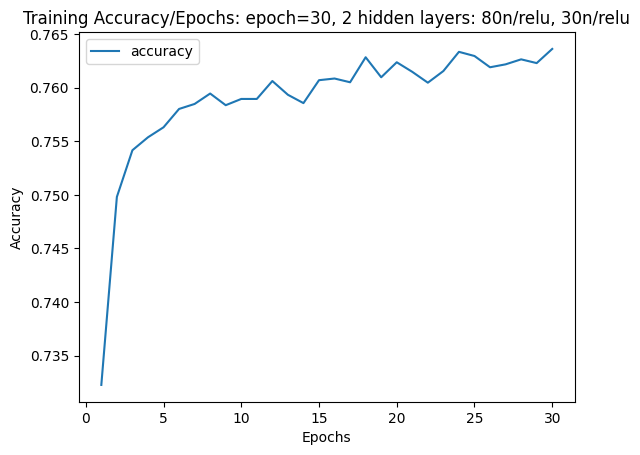

268/268 - 0s - loss: 0.5118 - accuracy: 0.7510 - 447ms/epoch - 2ms/step
Loss: 0.5117831826210022, Accuracy: 0.7510204315185547


In [82]:
# Define the architecture of the neural network
hidden_nodes = [80, 30]

# Activation functions for each hidden layer
activation_funcs = ["relu", "relu"]

# Train the neural network with specified parameters
neural_network(X_train_scaled, y_train, X_test_scaled, y_test, hidden_nodes, epochs=30, activation_funcs=activation_funcs, plot_title="Training Accuracy/Epochs: epoch=30, 2 hidden layers: 80n/relu, 30n/relu")

## Add a third layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 520)               24440     
                                                                 
 dense_1 (Dense)             (None, 320)               166720    
                                                                 
 dense_2 (Dense)             (None, 180)               57780     
                                                                 
 dense_3 (Dense)             (None, 1)                 181       
                                                                 
Total params: 249121 (973.13 KB)
Trainable params: 249121 (973.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
804/804 [==============================] - 7s 8ms/step - loss: 0.5409 - accuracy: 0.7294
Epoch 2/15
804/804 [============================

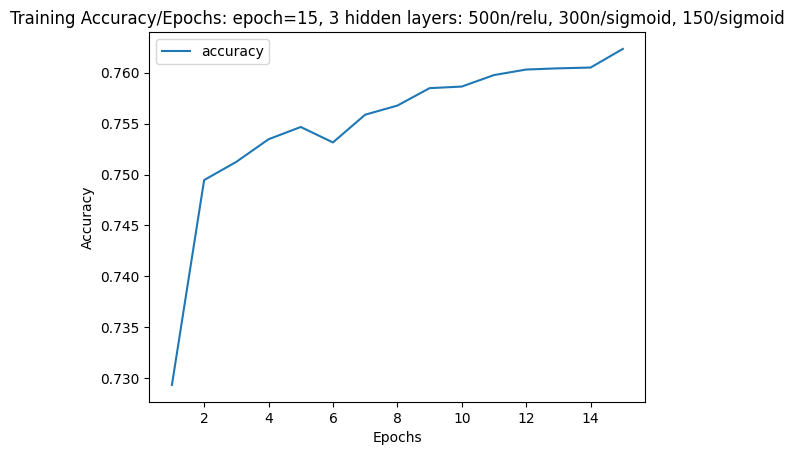

268/268 - 1s - loss: 0.5087 - accuracy: 0.7537 - 667ms/epoch - 2ms/step
Loss: 0.5087128281593323, Accuracy: 0.7537026405334473


In [83]:
# Define the architecture of the neural network
hidden_nodes = [520, 320,180]

# Activation functions for each hidden layer
activation_funcs = ["relu", "sigmoid","sigmoid"]

# Train the neural network with specified parameters
neural_network(X_train_scaled, y_train, X_test_scaled, y_test, hidden_nodes, epochs=15, activation_funcs=activation_funcs,plot_title="Training Accuracy/Epochs: epoch=15, 3 hidden layers: 500n/relu, 300n/sigmoid, 150/sigmoid")

In [86]:
# Export our model to HDF5 file
nn_opt.save("AlphabetSoupCharity_Final_Optimization.h5")